In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

Loading Dataset

In [59]:
titanic = pd.read_csv(url)

In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


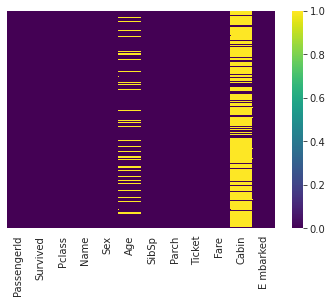

In [64]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

There are many null values in 'Age' and 'Cabin' section

### Feature Engineering

As cabin is irrelevant to dataset we can safely drop it

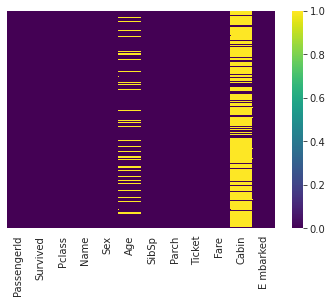

In [65]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

In [ ]:
Imputing data in Age attribute
Using mean age of the price class to impute the age for missing passengers
This is to have values in age column without losing the mean of existing age data

In [66]:
def impute_age(columns):
    #print(columns)
    if not pd.isnull(columns[1]):
        return columns[1]
    else:
        return round(titanic[titanic['Pclass'] == columns[0]]['Age'].mean(),2)
titanic['New_Age'] = titanic[['Pclass','Age']].apply(impute_age, axis=1)
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,New_Age
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.14
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.88
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,25.14
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,25.14
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,25.14


In [ ]:
Dropping all unnecessary attributes from the training dataset
Name : Character values which might not have impact on survival output
Age : Imputed age in new column "New_Age"
Ticket : Character values without a fixed pattern
Cabin : Many records don't have data in this column. Imputation is feasible.

In [70]:
titanic.drop(['Sex'],inplace=True,axis=1)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Ticket,Fare,E mbarked,New_Age
0,1,0,3,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,1,0,113803,53.1000,S,35.0
4,5,0,3,0,0,373450,8.0500,S,35.0


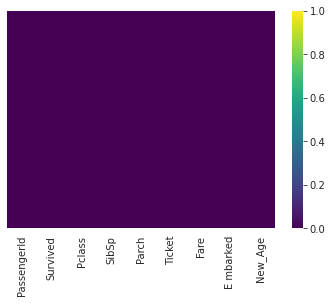

In [71]:
# Checking the heatmap of the train dataset again to confirm that there are no more missing values
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

we should categorize the Age Feautre 

In [74]:
titanic.drop(['Ticket'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,E mbarked,New_Age
0,1,0,3,1,0,7.2500,S,22.0
1,2,1,1,1,0,71.2833,C,38.0
2,3,1,3,0,0,7.9250,S,26.0
3,4,1,1,1,0,53.1000,S,35.0
4,5,0,3,0,0,8.0500,S,35.0


In [75]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,E mbarked,New_Age
0,1,0,3,1,0,7.2500,S,22.0
1,2,1,1,1,0,71.2833,C,38.0
2,3,1,3,0,0,7.9250,S,26.0
3,4,1,1,1,0,53.1000,S,35.0
4,5,0,3,0,0,8.0500,S,35.0


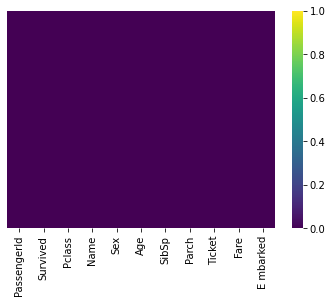

In [15]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
E mbarked      2
dtype: int64

In [17]:
titanic.dropna(inplace=True)

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
E mbarked      0
dtype: int64

We can see there are no 'Nan' values 

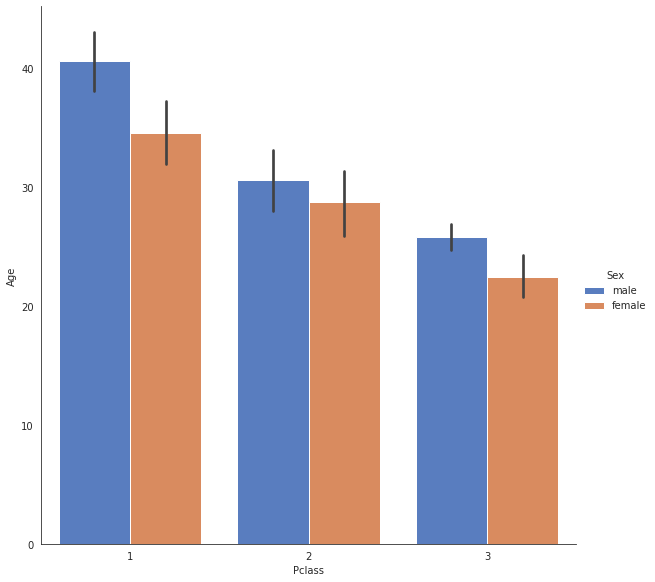

In [20]:
sns.set_style('white')
sns.catplot(x='Pclass',y='Age',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


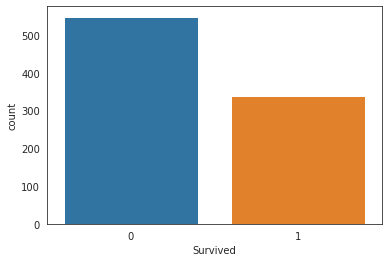

In [21]:
sns.countplot(titanic['Survived'])

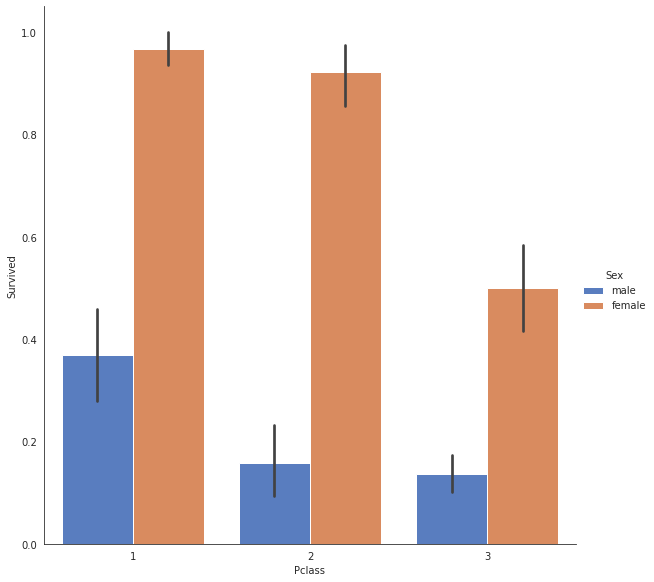

In [22]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

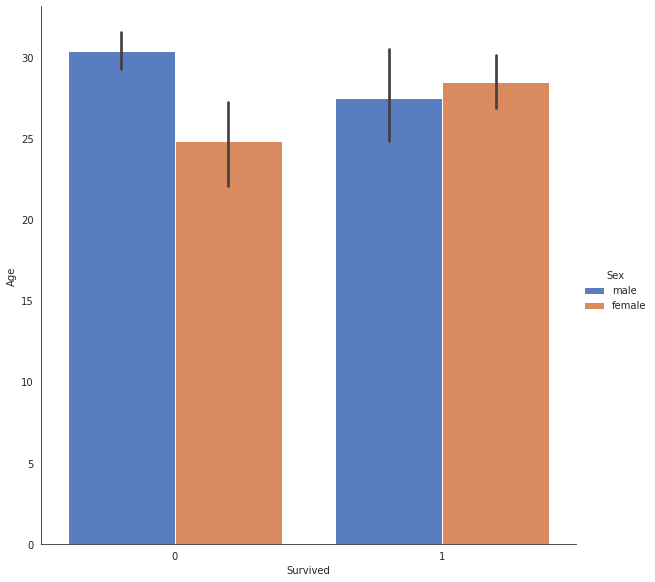

In [23]:
sns.catplot(x='Survived',y='Age',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

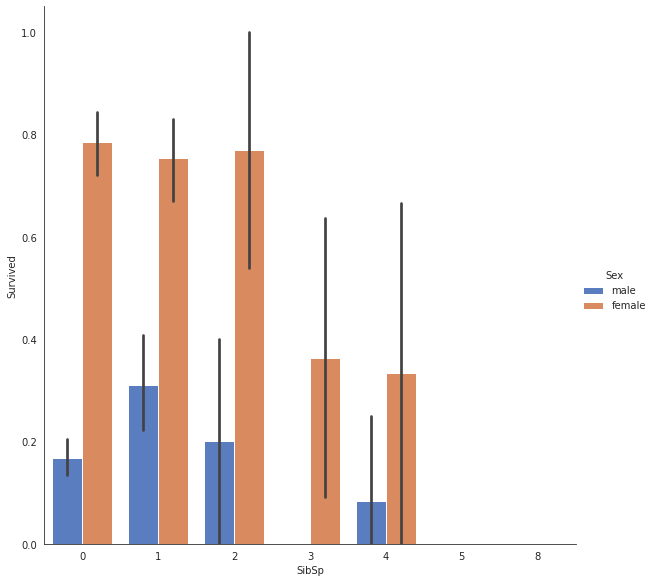

In [24]:
sns.catplot(x='SibSp',y='Survived',data=titanic,kind='bar',palette='muted',height=8,hue='Sex')

'''use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare'

In [77]:
X = titanic.drop(['PassengerId', 'Survived', 'E mbarked'],axis=1)
y = titanic['Survived']

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    int64  
 1   SibSp    891 non-null    int64  
 2   Parch    891 non-null    int64  
 3   Fare     891 non-null    float64
 4   New_Age  891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


from above we can see that 'Sex' is object i.e categorical
we need to change into numerical type

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    uint8  
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 82.5 KB


In [80]:
X

,Pclass,SibSp,Parch,Fare,New_Age
0,3,1,0,7.2500,22.00
1,1,1,0,71.2833,38.00
2,3,0,0,7.9250,26.00
3,1,1,0,53.1000,35.00
4,3,0,0,8.0500,35.00
...,...,...,...,...,...
886,2,0,0,13.0000,27.00
887,1,0,0,30.0000,19.00
888,3,1,2,23.4500,25.14
889,1,0,0,30.0000,26.00


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [82]:
x_train.shape

(623, 5)

In [83]:
y_train.shape

(623,)

In [84]:
x_test.shape

(268, 5)

In [85]:
y_test.shape

(268,)

### Applying Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.6977611940298507

### Applying Decision Tree 

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.6604477611940298

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
y_pred = dtc.predict(x_test)

In [90]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1])

In [38]:
Accuracy_score = accuracy_score(y_test,y_pred)
Accuracy_score

0.7565543071161048

In [39]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[131,  32],
       [ 33,  71]])

In [40]:
print(f"Cf_report : {classification_report(y_test,y_pred)}")

Cf_report :               precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.69      0.68      0.69       104

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



### Standardizing the X column before hyper tuning

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 101)

#### Using PCA for increasing Model Accuracy

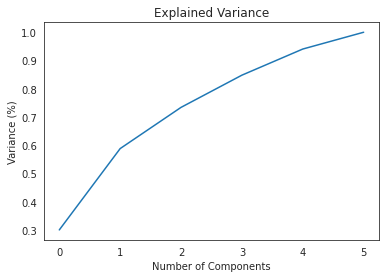

In [43]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [44]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [45]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.149264,0.528815,0.584284,0.287556,-0.354585
1,1.842776,-0.825277,-0.758807,0.105585,-1.026249
2,-0.584450,0.333029,-1.589178,-0.065420,-0.314779
3,1.580340,-0.663821,-0.849194,0.107797,-1.039623
4,-1.206563,-0.473137,0.301970,-0.323120,0.101534
...,...,...,...,...,...
884,-0.616528,-0.645694,0.304868,0.352805,0.160746
885,0.860073,-0.411065,-1.463405,0.895568,-0.277645
886,0.708428,2.002990,-0.863876,-1.043703,0.729186
887,0.211034,-1.133769,0.410288,0.748125,0.164126


In [46]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 101)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7715355805243446

We can see there is slight increase in model accuracy score 

In [47]:
#by tuning hyper parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

### Using GridSearchCV 

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

### Finding Best Parameters

In [50]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'random'}


0.8103225806451613

### Aplying best params in Decision Tree

In [51]:
Dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 6,min_samples_split=7, splitter ='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [52]:
Dtc2.score(x_test,y_test)

0.8127340823970037

After Hyper parameters we can see there is increase in model accuracy 

In [53]:
import pickle

with open('DTCmodelForprediction.sav','wb') as f:
    pickle.dump(Dtc2,f)

with open ('StandardScaler.sav','wb') as f:
    pickle.dump(scalar,f)
    
with open ('PCAmodel.sav','wb') as f:
    pickle.dump(pca,f)